In [25]:
import os

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.coordinates as coord
from astropy.table import Table
import astropy.units as u
from tqdm import tqdm
import emcee

import gala.coordinates as gc
import gala.dynamics as gd
import gala.potential as gp

from coordinates import (pal5_c, galcen_frame, 
                         pal5_lead_frame, pal5_trail_frame)

from density_1d import run_it_all

Grab coordinates of M5, and remove stars close to M5 or the Pal 5 cluster:

In [2]:
# m5_c = coord.SkyCoord.from_name('Messier 5')
m5_c = coord.SkyCoord('15 18 33.22', '+02 04 51.7', 
                      unit=(u.hourangle, u.degree))

In [5]:
ana = fits.getdata('../data/pal5_ls_lite_grz.fits')
ana_masks = fits.getdata('../data/cmd_masks_orig.fits')
ana = ana[ana_masks['gr_mask'] & ana_masks['grz_mask']]

data_c = coord.SkyCoord(ra=ana['ra'], dec=ana['dec'], unit=u.deg)
pal5_m5_mask = (data_c.separation(pal5_c) > 0.2*u.deg) & (data_c.separation(m5_c) > 0.3*u.deg)
data_c = data_c[pal5_m5_mask]

Load Ana's spatial mask around the deeper footprint:

In [6]:
mask_zlim = 23.7
mask_pts = np.load('../data/concave_hull_z{:.1f}.npz'.format(mask_zlim))['pts']
path_concavehull = mpl.path.Path(mask_pts)

_c = data_c.transform_to(gc.Pal5)
_X = np.stack((_c.phi1.degree, _c.phi2.degree)).T
deep_mask = path_concavehull.contains_points(_X)

In [77]:
tbls = run_it_all(data_c[deep_mask], 'data', nburn=10, nsteps=10)

11it [00:00, 1569.88it/s]
0it [00:00, ?it/s]
 50%|█████     | 5/10 [00:00<00:00, 48.80it/s]

running measurements for 'lead'
running measurements for 'trail'



1it [00:00,  1.54it/s] [00:00<00:00, 48.49it/s]
 60%|██████    | 6/10 [00:00<00:00, 52.30it/s]


2it [00:01,  1.54it/s] [00:00<00:00, 51.00it/s]
 60%|██████    | 6/10 [00:00<00:00, 51.79it/s]


3it [00:01,  1.54it/s] [00:00<00:00, 50.61it/s]
 60%|██████    | 6/10 [00:00<00:00, 50.93it/s]


4it [00:02,  1.54it/s] [00:00<00:00, 49.53it/s]
 60%|██████    | 6/10 [00:00<00:00, 51.94it/s]


5it [00:03,  1.54it/s] [00:00<00:00, 50.39it/s]
 60%|██████    | 6/10 [00:00<00:00, 52.77it/s]


6it [00:03,  1.55it/s] [00:00<00:00, 51.51it/s]
 60%|██████    | 6/10 [00:00<00:00, 51.96it/s]


7it [00:04,  1.56it/s] [00:00<00:00, 50.43it/s]
 60%|██████    | 6/10 [00:00<00:00, 54.08it/s]


8it [00:05,  1.57it/s] [00:00<00:00, 52.75it/s]
 60%|██████    | 6/10 [00:00<00:00, 52.42it/s]


9it [00:05,  1.58it/s] [00:00<00:00, 51.52it/s]
 60%|██████    | 6/10 [00:00<00:00, 53.60it/s]


10it [00:06,  1.59it/s][00:00<00:00, 52.14it/s]
 60%|██████    | 6/10 [00:00<00:00, 54.18it/s]


11it [00:07,  1.58it/s][00:00<00:00, 53.07it/s]
 60%|██████    | 6/10 [00:00<00:00, 51.22it/s]


12it [00:07,  1.58it/s][00:00<00:00, 50.12it/s]
 60%|██████    | 6/10 [00:00<00:00, 52.42it/s]


13it [00:08,  1.56it/s][00:00<00:00, 52.04it/s]
 60%|██████    | 6/10 [00:00<00:00, 50.78it/s]


14it [00:08,  1.55it/s][00:00<00:00, 48.83it/s]
 50%|█████     | 5/10 [00:00<00:00, 48.66it/s]


15it [00:09,  1.54it/s][00:00<00:00, 48.89it/s]
 60%|██████    | 6/10 [00:00<00:00, 52.72it/s]


16it [00:10,  1.54it/s][00:00<00:00, 51.31it/s]
 60%|██████    | 6/10 [00:00<00:00, 51.21it/s]


17it [00:10,  1.55it/s][00:00<00:00, 50.52it/s]
 60%|██████    | 6/10 [00:00<00:00, 50.23it/s]


18it [00:11,  1.54it/s][00:00<00:00, 49.42it/s]
 60%|██████    | 6/10 [00:00<00:00, 53.22it/s]


19it [00:12,  1.54it/s][00:00<00:00, 52.28it/s]
 60%|██████    | 6/10 [00:00<00:00, 52.73it/s]


20it [00:12,  1.56it/s][00:00<00:00, 51.69it/s]
 60%|██████    | 6/10 [00:00<00:00, 52.29it/s]


21it [00:13,  1.56it/s][00:00<00:00, 51.41it/s]
 60%|██████    | 6/10 [00:00<00:00, 55.22it/s]


22it [00:14,  1.58it/s][00:00<00:00, 54.56it/s]

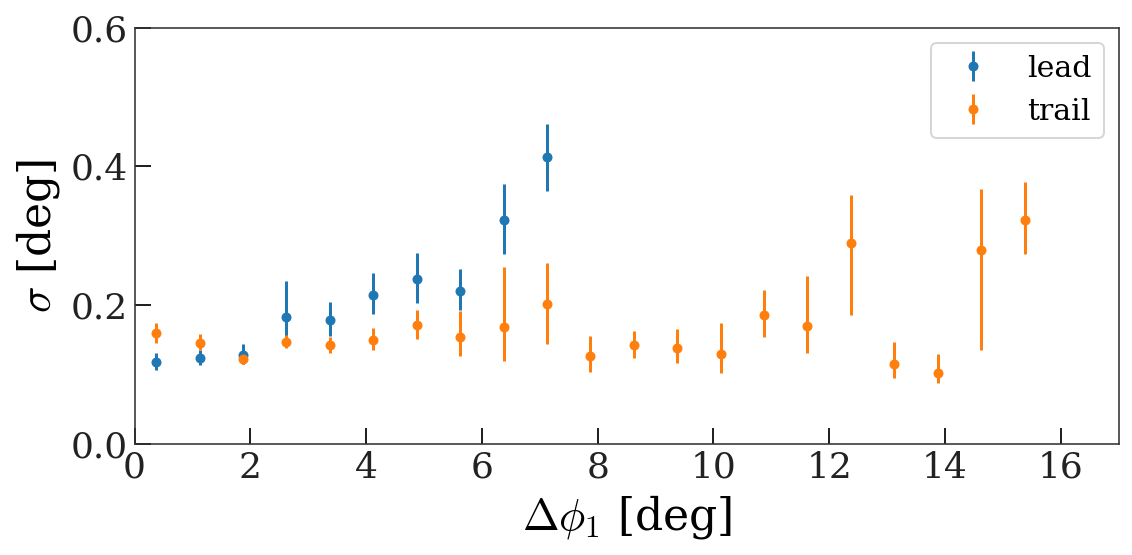

In [73]:
fig = plt.figure(figsize=(8,4))

for name in data.keys():
    flatchain = flatchains[name]
    med = np.median(flatchain['std_s'], axis=1)
    err1 = med - np.percentile(flatchain['std_s'], 16, axis=1)
    err2 = np.percentile(flatchain['std_s'], 84, axis=1) - med
    plt.errorbar(flatchain['phi1_bin_c'], med, yerr=(err1, err2),
                 ls='none', marker='o', label=name)
plt.legend(loc='best', fontsize=15)
    
plt.xlim(0, 17)
plt.xticks(np.arange(0, 16+1e-3, 2))
plt.ylim(0, 0.6)

plt.xlabel(r'$\Delta \phi_1$ [deg]')
plt.ylabel(r'$\sigma$ [deg]')
fig.set_facecolor('w')
fig.tight_layout()

fig.savefig('../plots/density-1d-width.png', dpi=250)

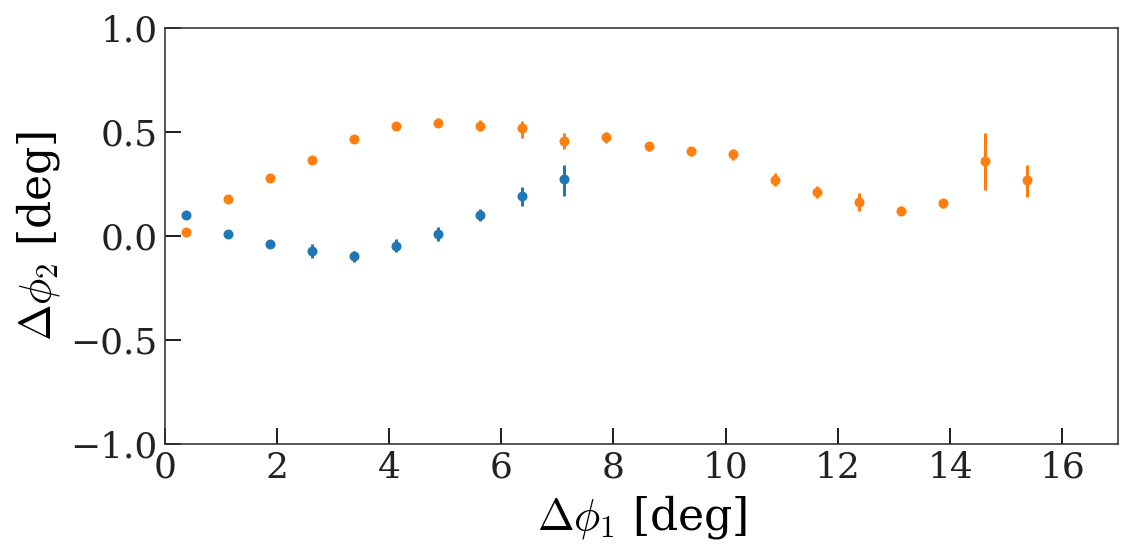

In [74]:
fig = plt.figure(figsize=(8,4))

for name in data.keys():
    flatchain = flatchains[name]
    med = np.median(flatchain['mu_s'], axis=1)
    err1 = med - np.percentile(flatchain['mu_s'], 16, axis=1)
    err2 = np.percentile(flatchain['mu_s'], 84, axis=1) - med
    plt.errorbar(flatchain['phi1_bin_c'], med, yerr=(err1, err2),
                 ls='none', marker='o')
    
plt.xlim(0, 17)
plt.ylim(-1, 1)
plt.xticks(np.arange(0, 16+1e-3, 2))

plt.xlabel(r'$\Delta \phi_1$ [deg]')
plt.ylabel('$\Delta \phi_2$ [deg]')
fig.set_facecolor('w')
fig.tight_layout()

fig.savefig('../plots/density-1d-track.png', dpi=250)

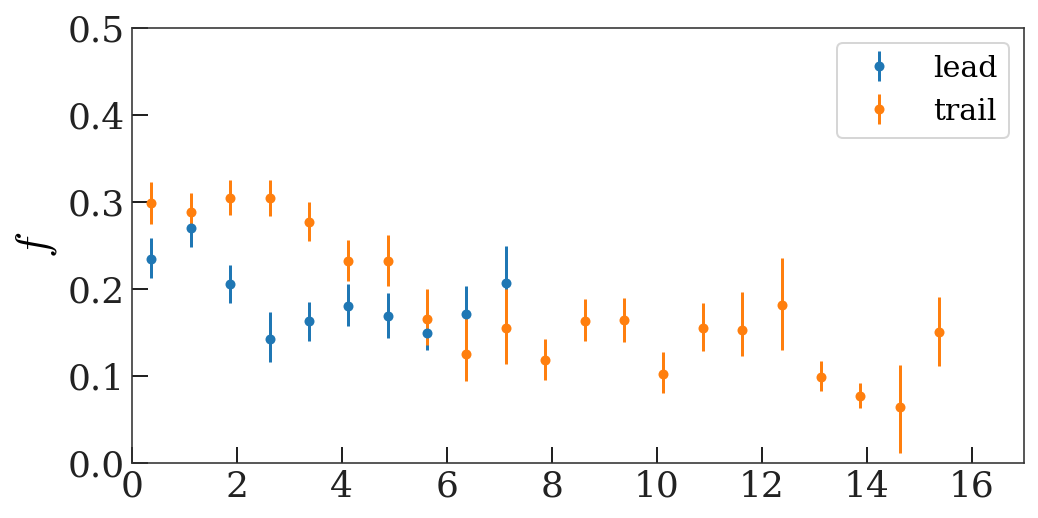

In [75]:
plt.figure(figsize=(8, 4))
for name in data.keys():
    flatchain = flatchains[name]
    ch = flatchain['a']
    med = np.median(ch, axis=1)
    err1 = med - np.percentile(ch, 16, axis=1)
    err2 = np.percentile(ch, 84, axis=1) - med
    plt.errorbar(flatchain['phi1_bin_c'], med, yerr=(err1, err2),
                 ls='none', marker='o', label=name)

plt.legend(loc='best', fontsize=15)

plt.xlim(0, 17)
plt.ylim(0, 0.5)
plt.xticks(np.arange(0, 16+1e-3, 2))

plt.ylabel('$f$')

fig.savefig('../plots/density-1d-f.png', dpi=250)

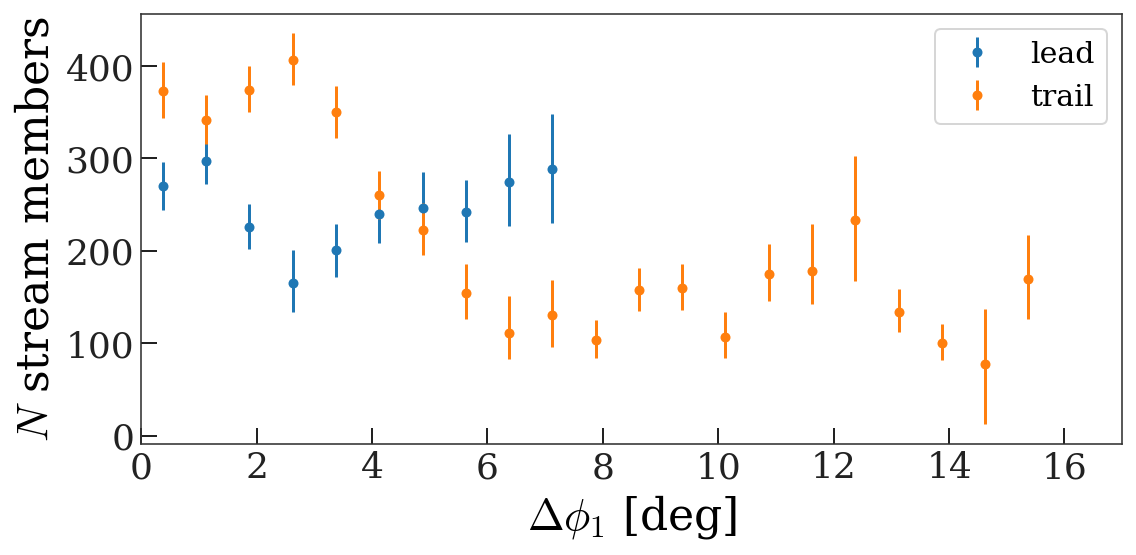

In [71]:
fig = plt.figure(figsize=(8,4))

for name in data.keys():
    flatchain = flatchains[name]
    ch = flatchain['a'] * flatchain['N'][:, None]

    med = np.median(ch, axis=1)
    err1 = med - np.percentile(ch, 16, axis=1)
    err2 = np.percentile(ch, 84, axis=1) - med
    plt.errorbar(flatchain['phi1_bin_c'], med, yerr=(err1, err2),
                 ls='none', marker='o', label=name)
plt.legend(loc='best', fontsize=15)
    
plt.xlim(0, 17)
# plt.ylim(0, 0.25)
plt.xticks(np.arange(0, 16+1e-3, 2))

plt.xlabel(r'$\Delta \phi_1$ [deg]')
plt.ylabel('$N$ stream members')
fig.set_facecolor('w')
fig.tight_layout()

fig.savefig('../plots/density-1d-N.png', dpi=250)

/mnt/home/apricewhelan/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


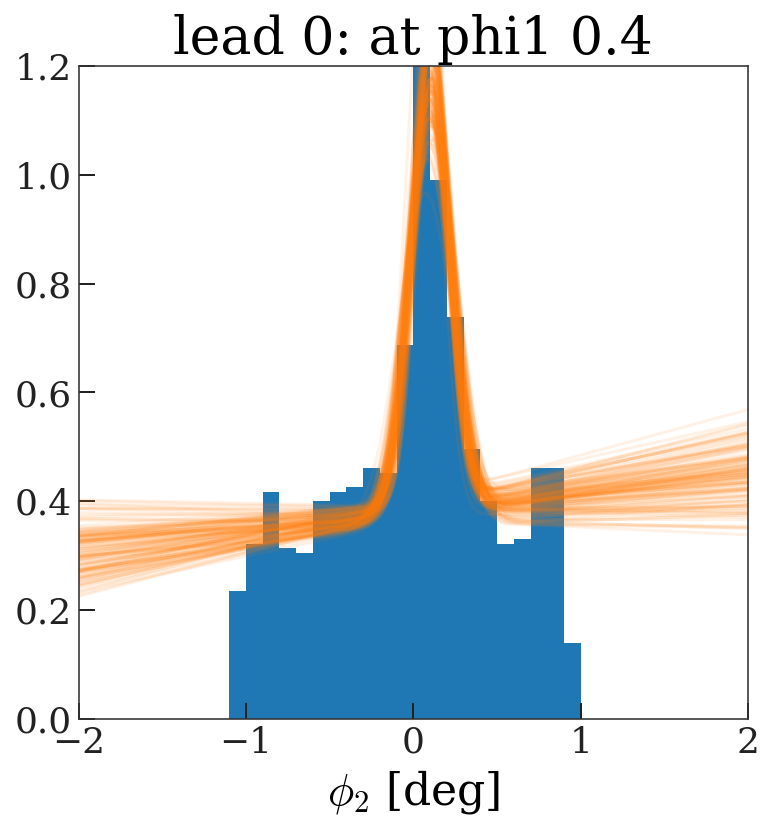

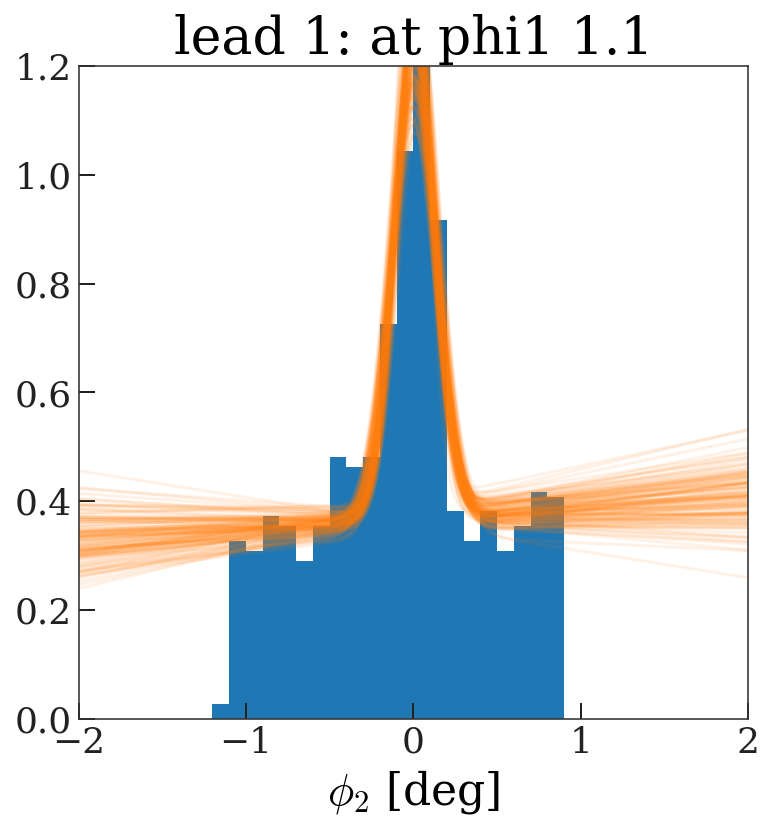

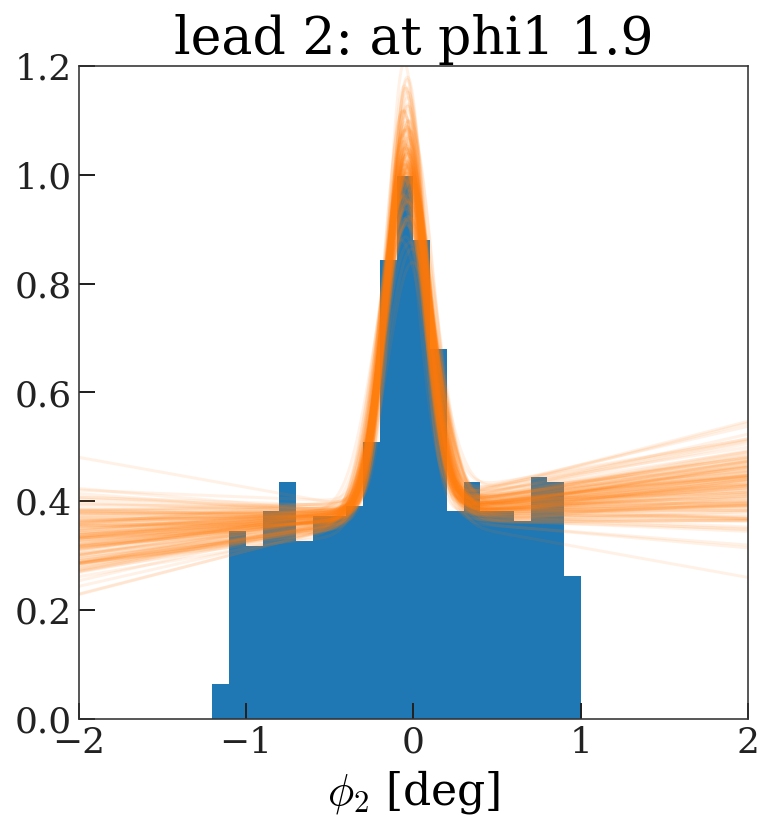

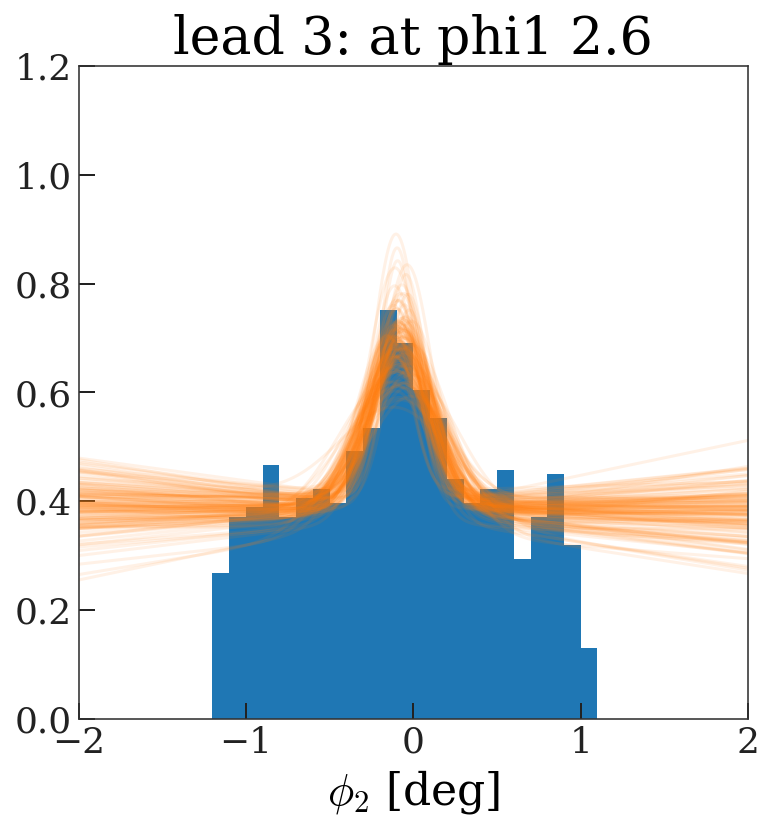

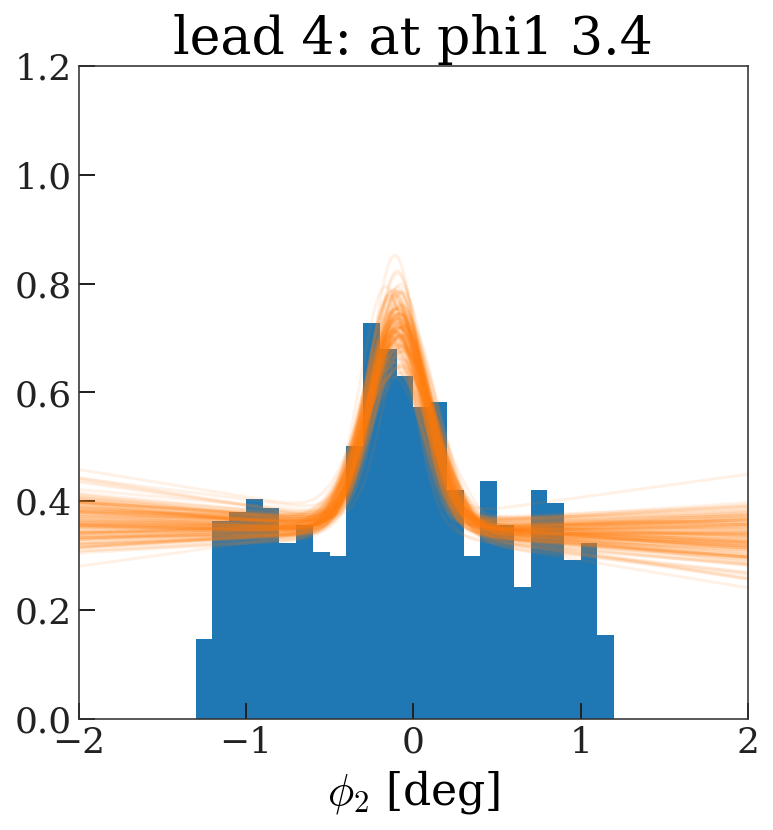

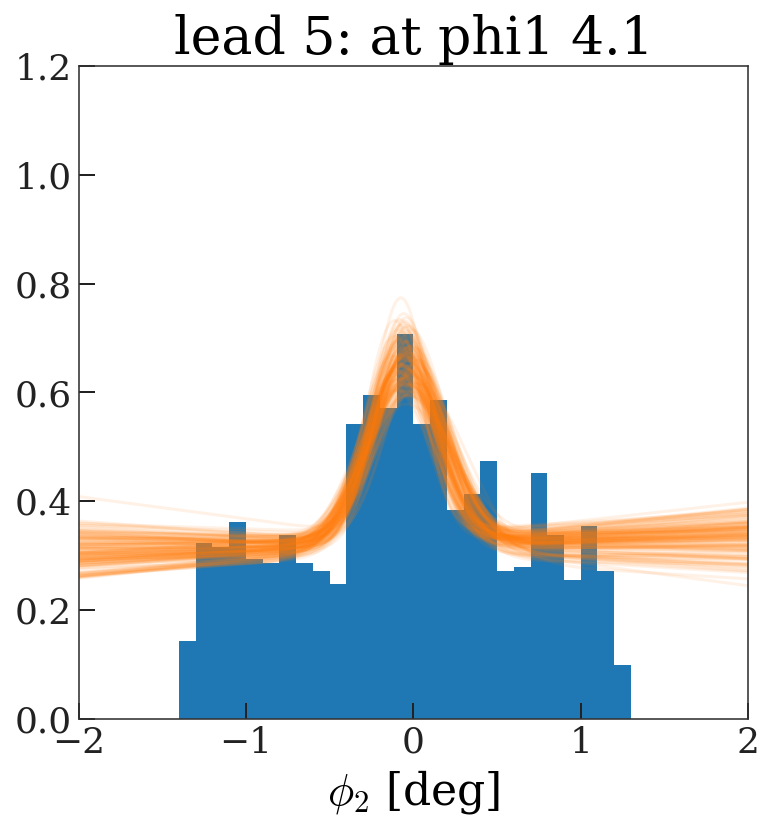

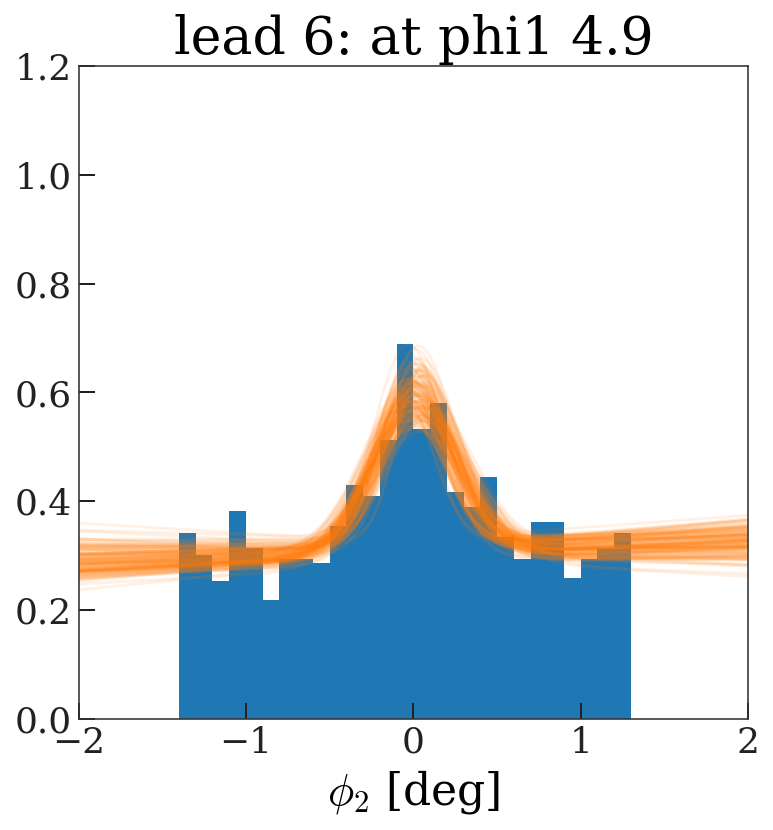

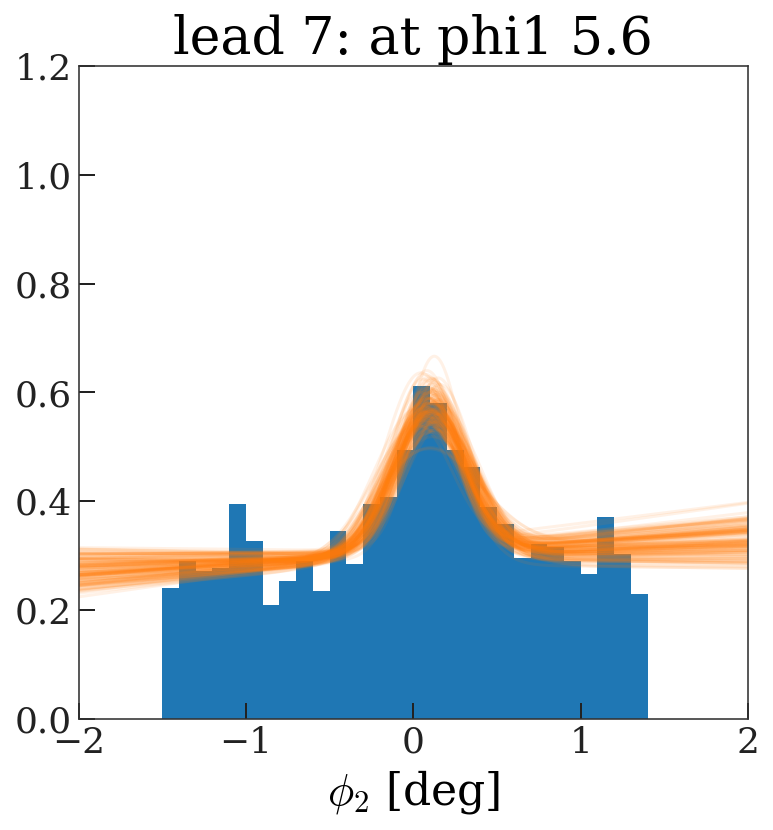

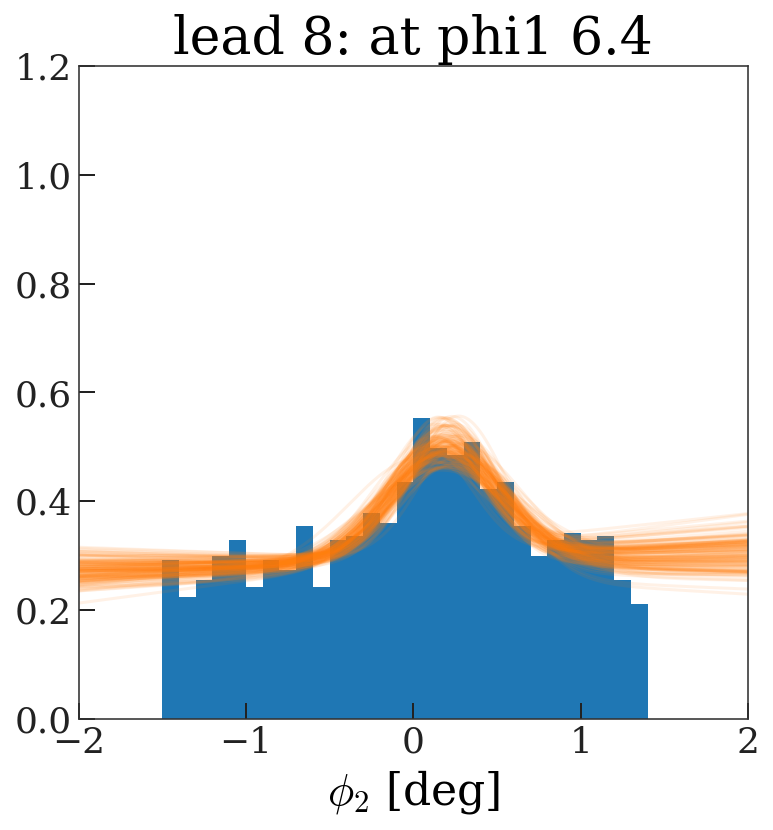

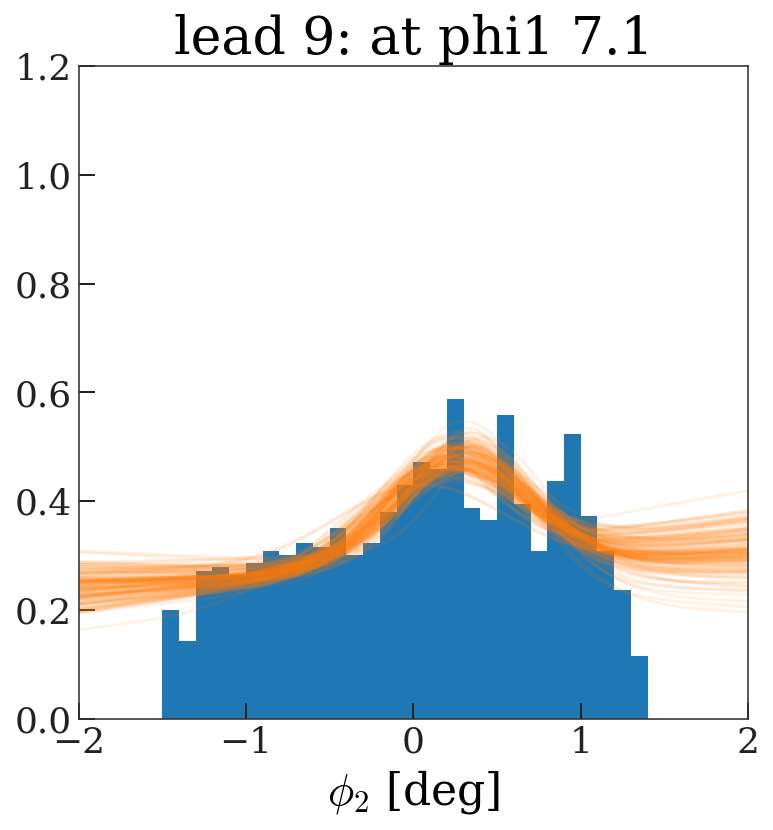

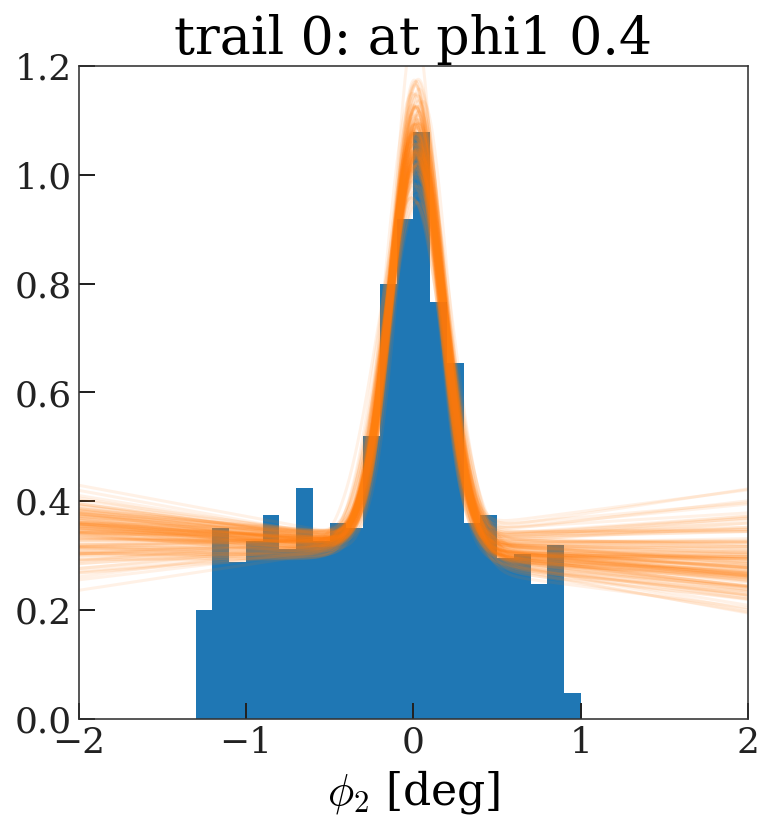

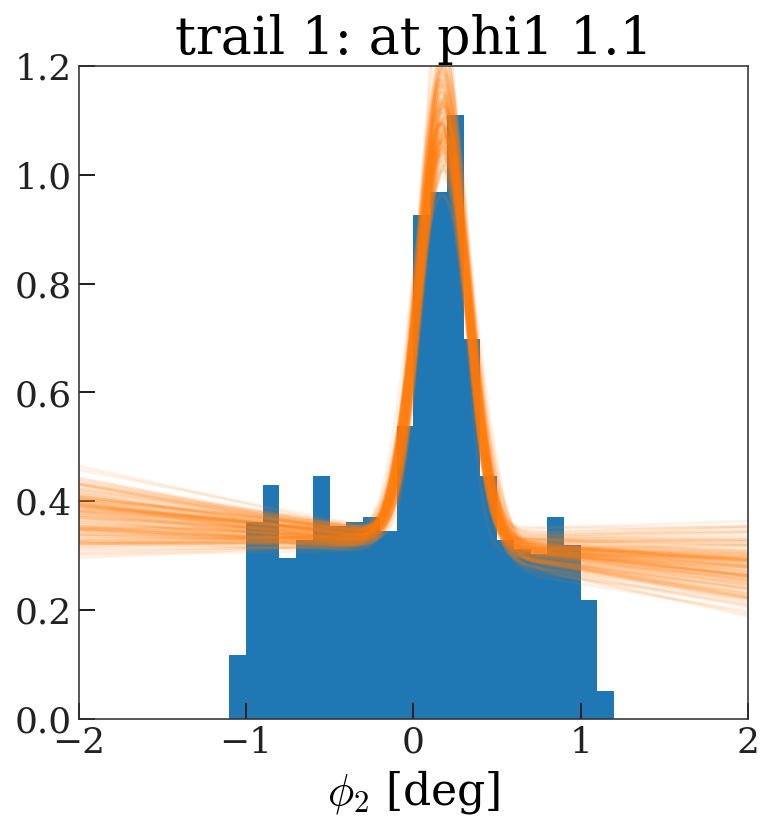

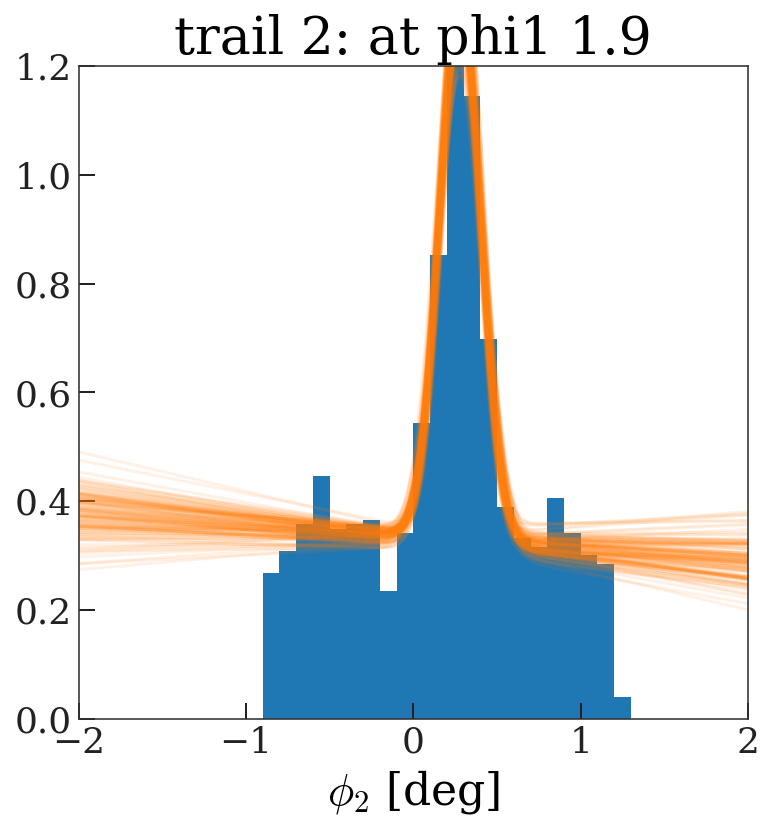

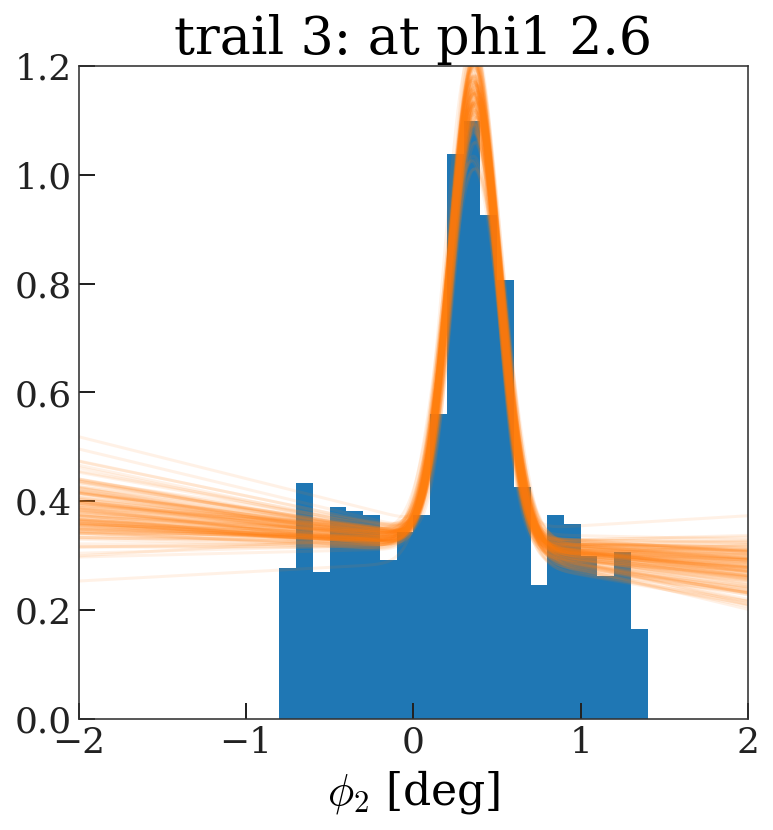

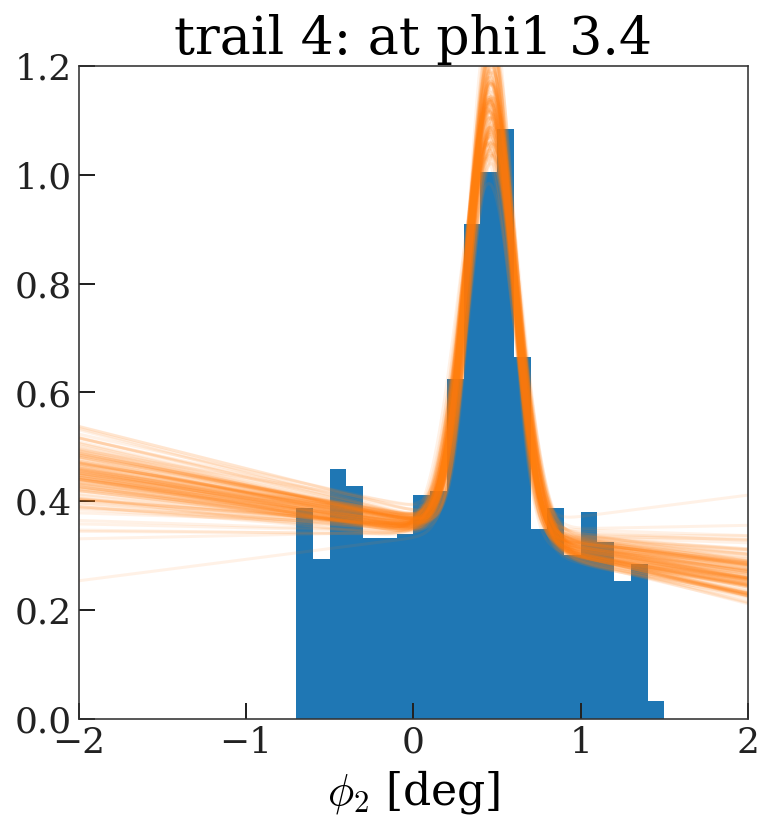

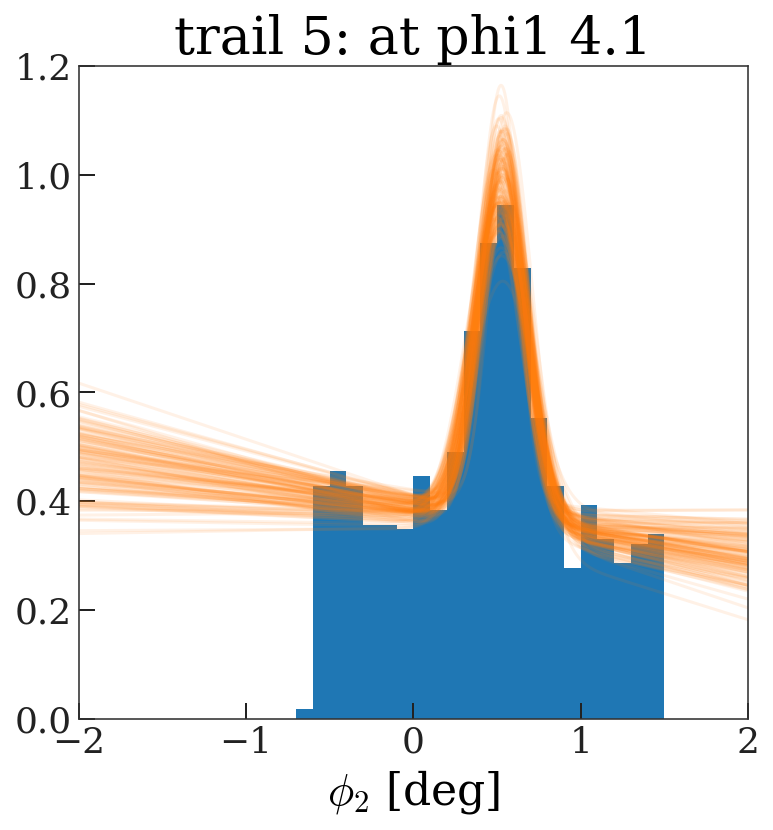

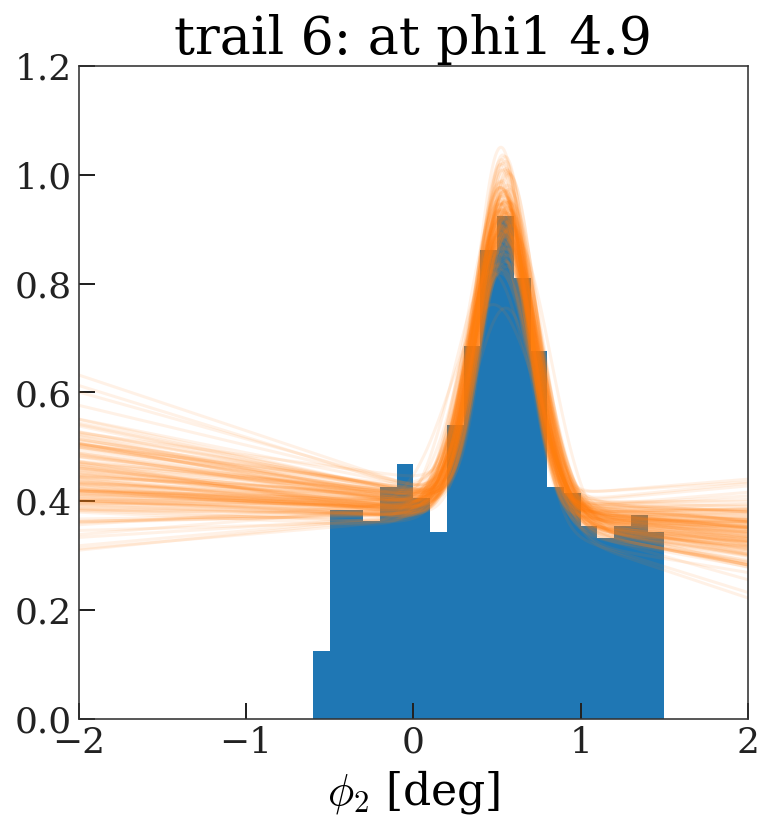

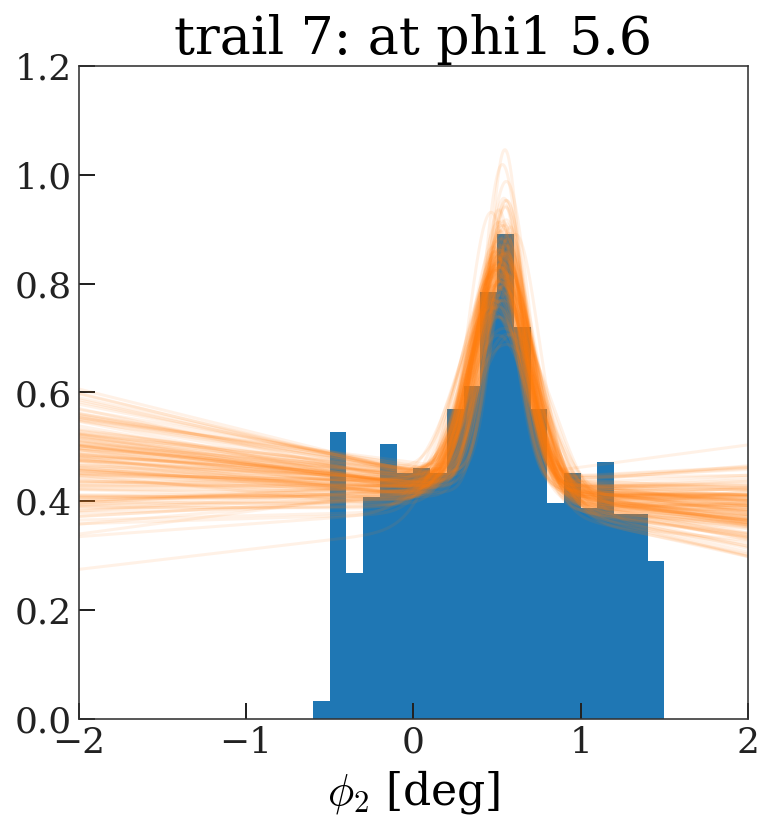

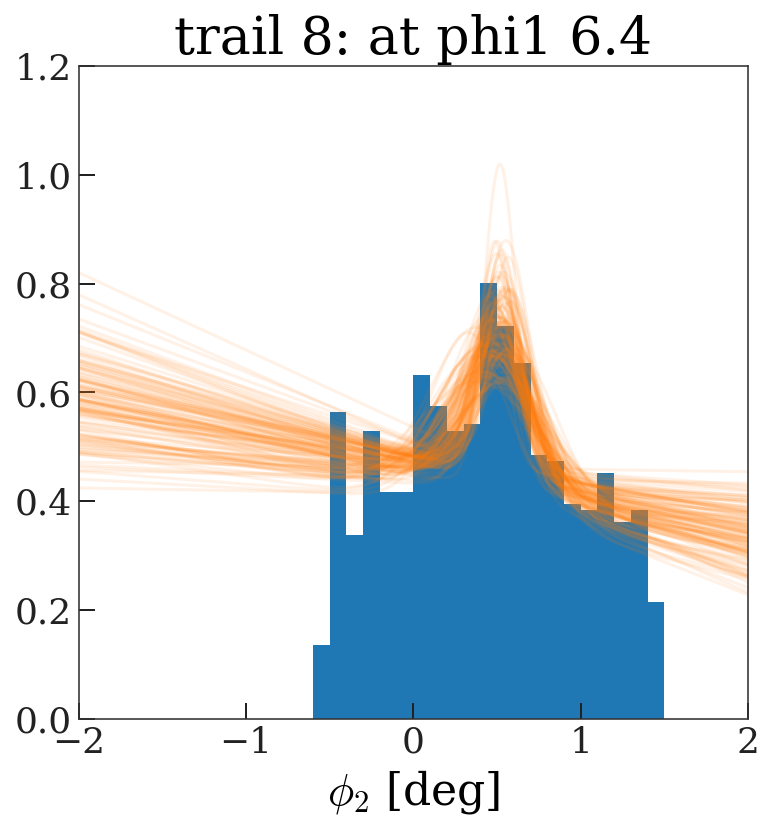

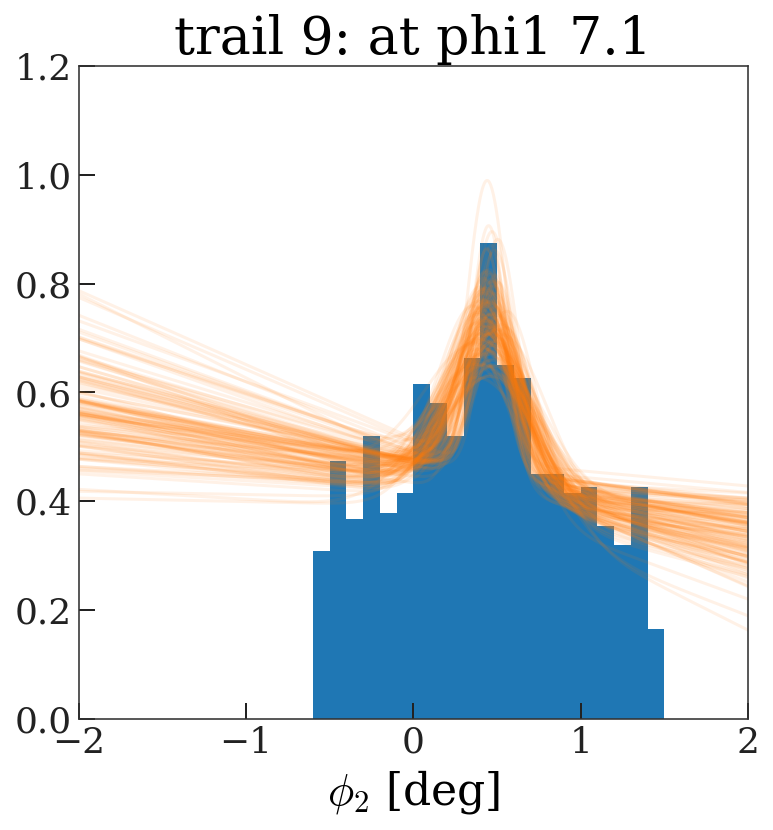

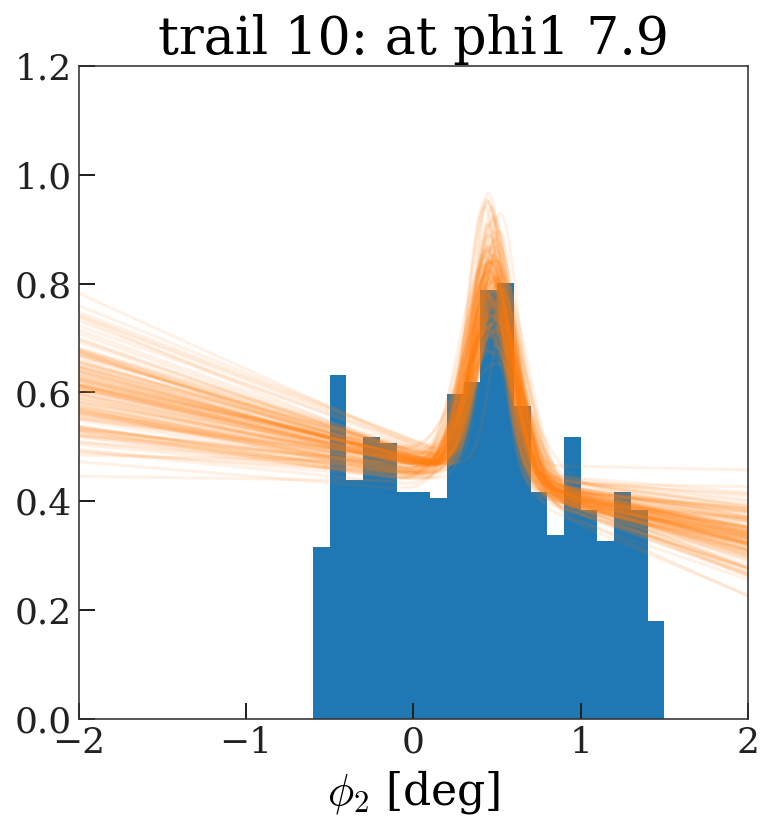

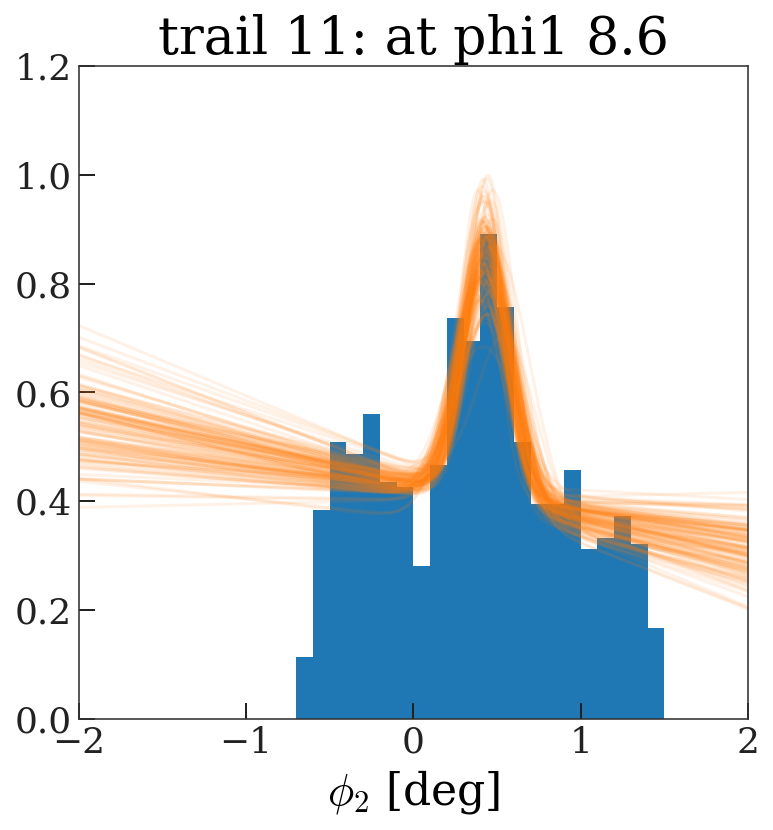

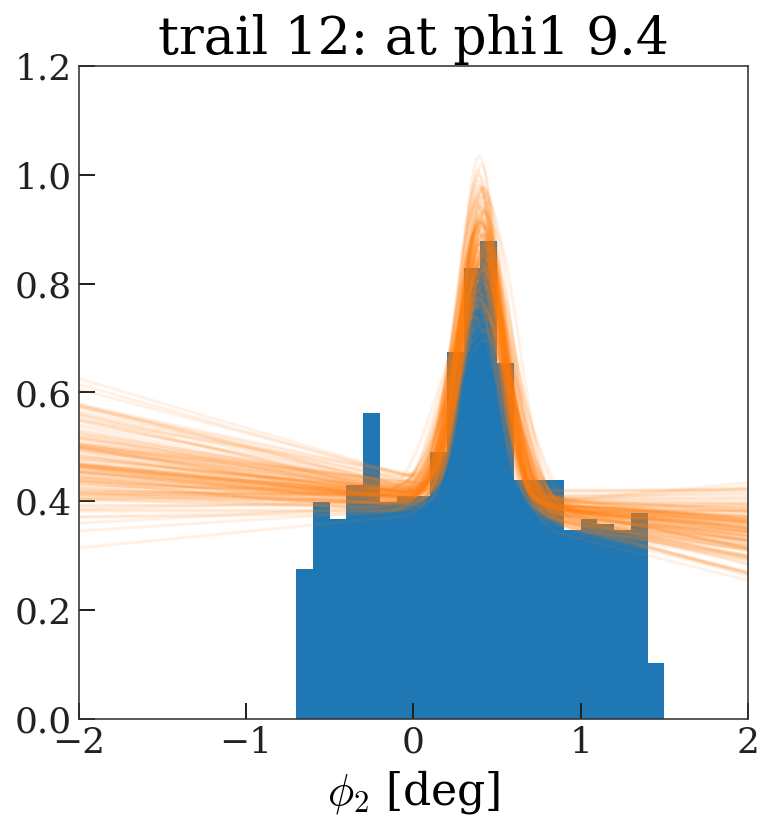

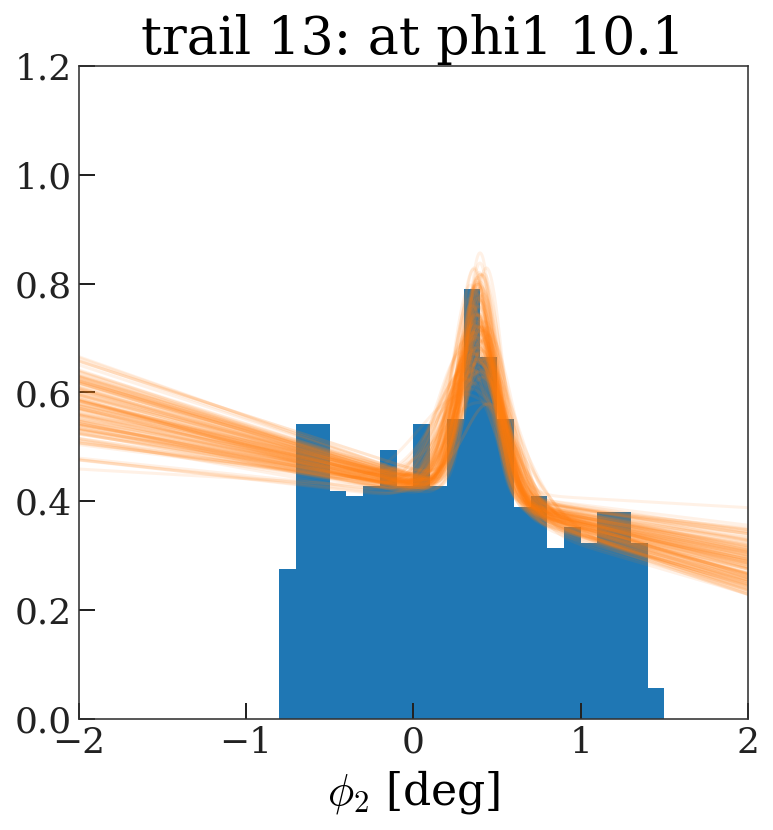

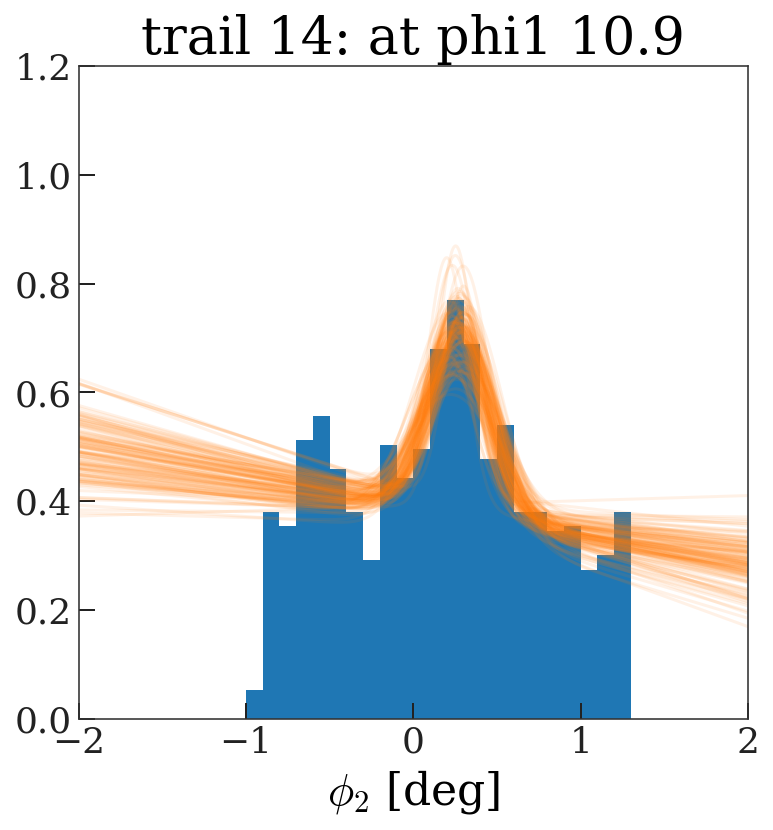

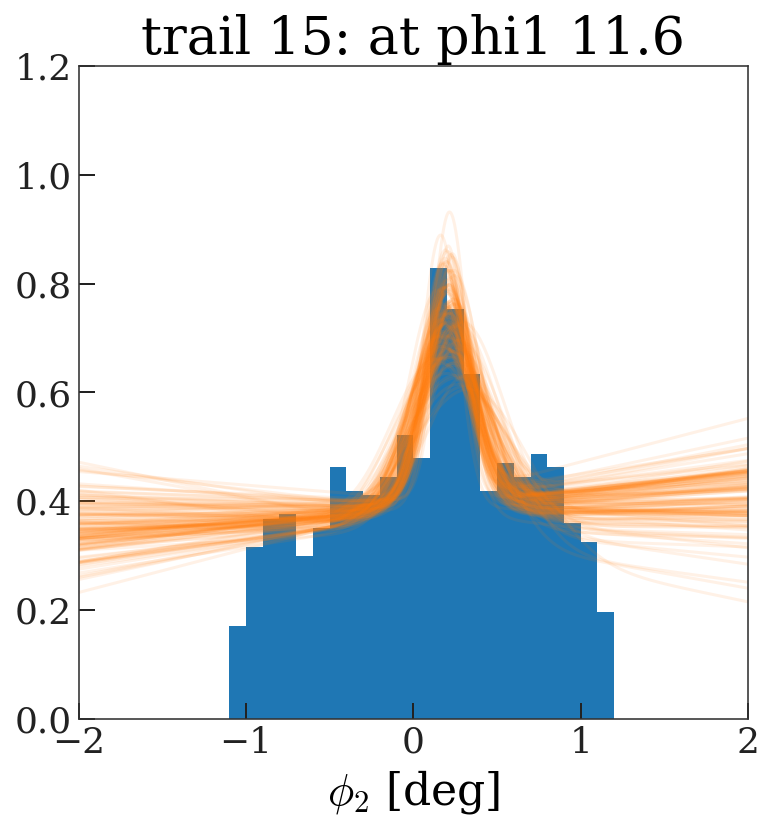

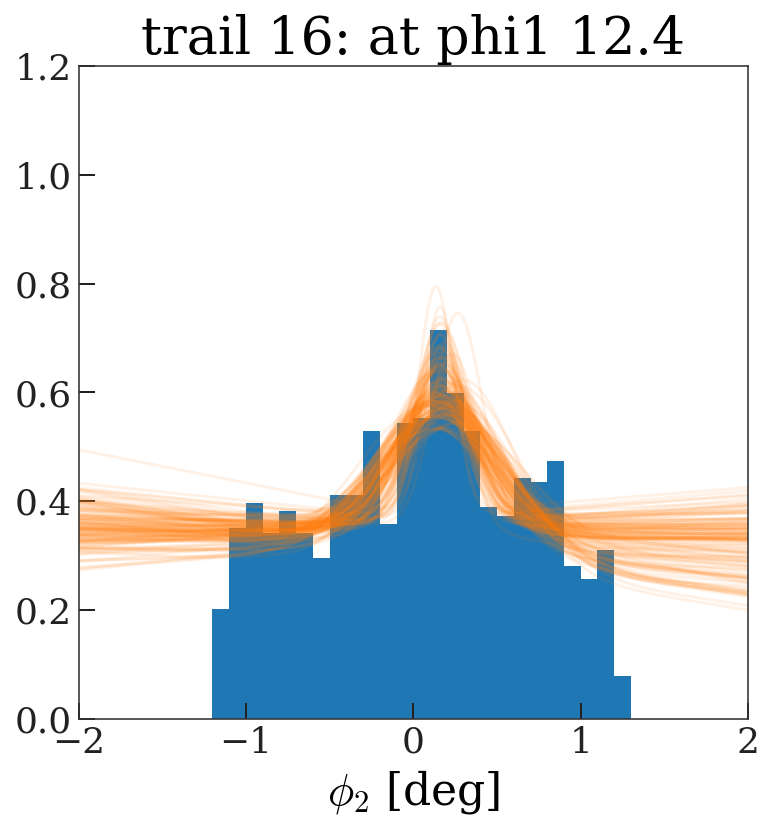

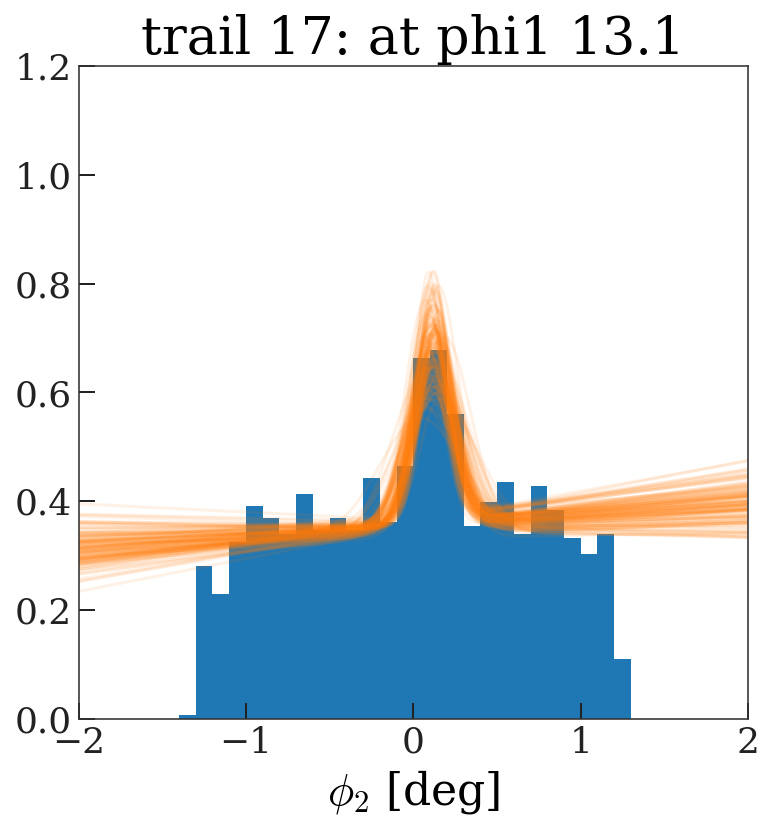

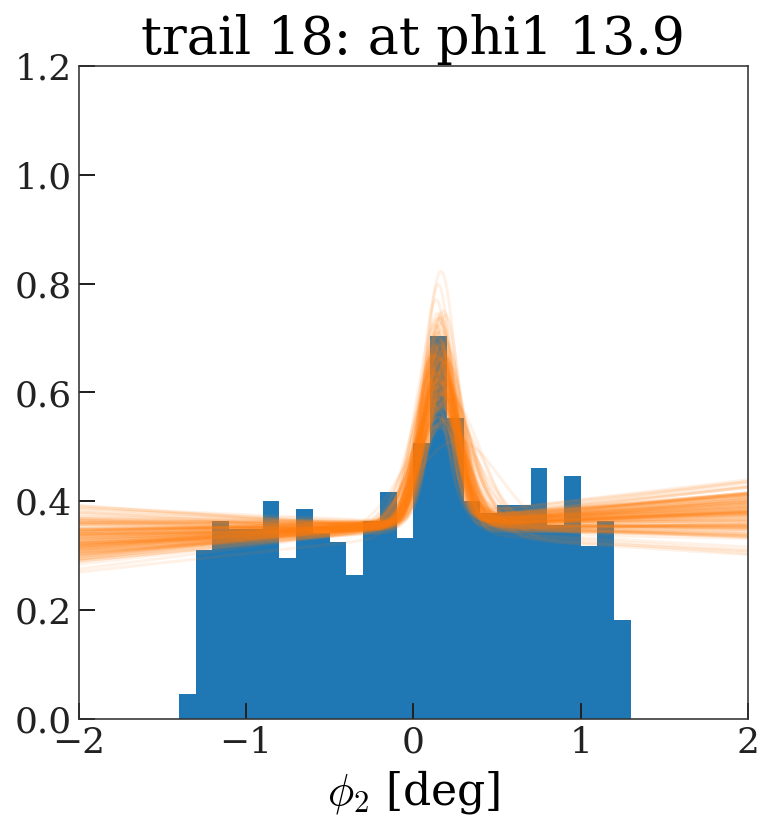

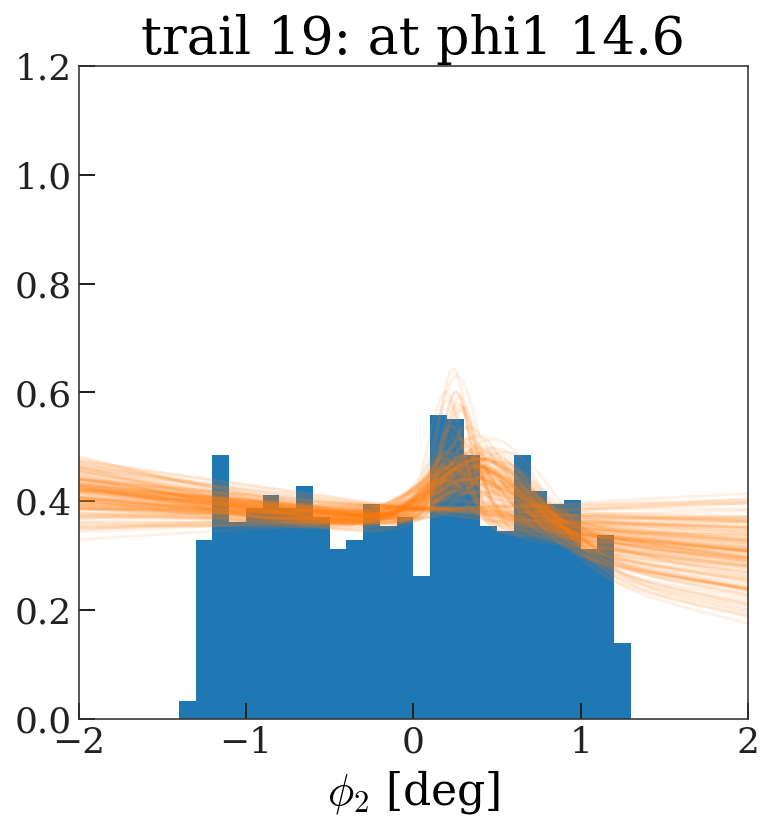

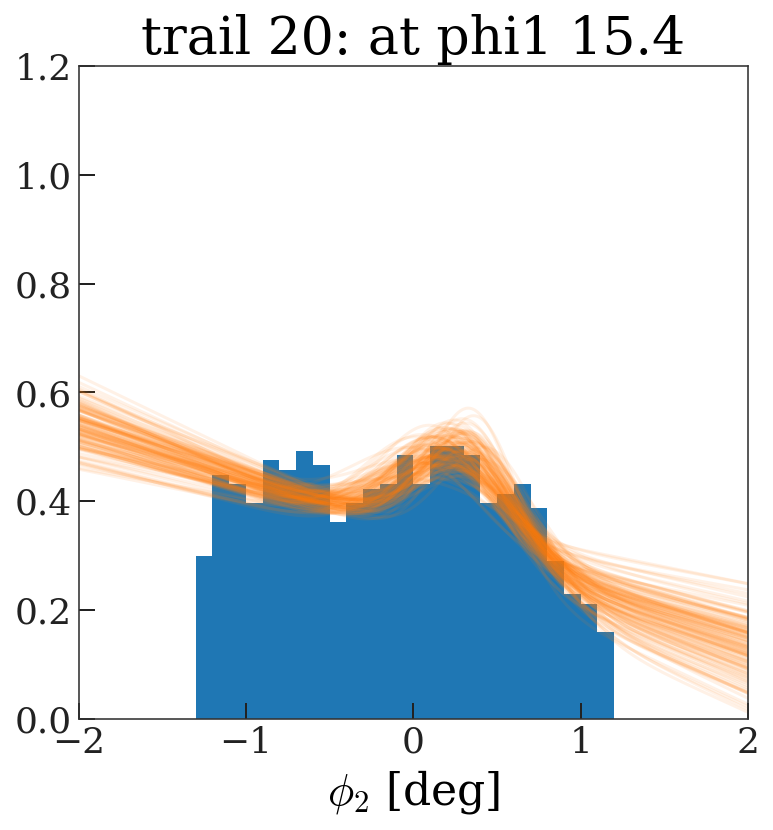

In [72]:
for name in data.keys():
    this_data = data[name]
    X = this_data['X']
    
    phi1_bin_c = 0.5 * (this_data['phi1_bins'][:-1] + this_data['phi1_bins'][1:])
    for i,l,r in zip(range(len(phi1_bin_c)),
                     this_data['phi1_bins'][:-1],
                     this_data['phi1_bins'][1:]):
        # phi1_mask = (X[:, 0] > l) & (X[:, 0] <= r)
        phi1_mask = (X[:, 0] > l) & (X[:, 0] <= (r + h_phi1)) # HACK: bigger bin
        
        phi2_min = X[phi1_mask, 1].min() + 0.15
        phi2_max = X[phi1_mask, 1].max() - 0.15
        phi2_mask = (X[:, 1] > phi2_min) & (X[:, 1] < phi2_max)
        
        binX = X[phi1_mask & phi2_mask]
        sampler = data[name]['samplers'][i]
        
        plt.figure()
        plt.hist(binX[:, 1], bins=phi2_bins, density=True);
        _grid = np.linspace(-2, 2, 1000)
        
        for k in np.random.choice(len(sampler.flatchain), size=128, replace=False):
            pp = sampler.flatchain[k]
            plt.plot(_grid, np.exp(lnlike(pp, _grid, phi2_min, phi2_max)), 
                     marker='', alpha=0.1, color='tab:orange')
        # plt.plot(_grid, np.exp(lnlike(p0, _grid)), marker='', ls='--')
        plt.title("{} {}: at phi1 {:.1f}".format(name, i, phi1_bin_c[i]))
        plt.xlim(-2, 2)
        plt.ylim(0, 1.2)
        plt.xlabel(r'$\phi_2$ [deg]')

---

In [ ]:
flatchains['lead'].write('../data/pal5_lead_samples.fits', overwrite=True)
flatchains['trail'].write('../data/pal5_trail_samples.fits', overwrite=True)

### Plot tracks:

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def f(phi1, *p):
    return np.poly1d(p)(phi1)

In [ ]:
for X, tbl in zip([Xl, Xt],
                  [flatchains['lead'], flatchains['trail']]):
    
    pars, cov = curve_fit(f, tbl['phi1_bin_c'], 
                          np.median(tbl['std_s'], axis=1), 
                          sigma=np.std(tbl['std_s'], axis=1),
                          p0=np.zeros(3))
    width_poly = np.poly1d(pars)
    
    pars, cov = curve_fit(f, tbl['phi1_bin_c'], 
                          np.median(tbl['mu_s'], axis=1), 
                          sigma=np.std(tbl['mu_s'], axis=1),
                          p0=np.zeros(5))
    phi2_poly = np.poly1d(pars)
    
    # ---
    # Store selection regions for data:
    grid = np.linspace(0, 16, 128)

    verts1 = np.vstack((np.stack((grid, phi2_poly(grid) + 3*width_poly(grid))).T,
                        np.stack((grid, phi2_poly(grid) + 5*width_poly(grid))).T[1:][::-1]))
    verts2 = np.vstack((np.stack((grid, phi2_poly(grid) - 3*width_poly(grid))).T,
                        np.stack((grid, phi2_poly(grid) - 5*width_poly(grid))).T[1:][::-1]))
    ctl_paths = [mpl.path.Path(verts1),
                 mpl.path.Path(verts2)]

    verts = np.vstack((np.stack((grid, phi2_poly(grid) - 2*width_poly(grid))).T,
                       np.stack((grid, phi2_poly(grid) + 2*width_poly(grid))).T[1:][::-1]))
    str_path = mpl.path.Path(verts)
    
    with open('ctl_paths_{}.pkl'.format(name), 'wb') as _f:
        pickle.dump(ctl_paths, _f)
        
    with open('str_path_{}.pkl'.format(name), 'wb') as _f:
        pickle.dump(str_path, _f)
    
    # ---
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))

    ax.plot(X[:, 0], X[:, 1],
            marker='o', ls='none', 
            color='k', alpha=0.25, ms=2)
    
    ax.add_patch(mpl.patches.Polygon(verts1, color='tab:red', alpha=0.2))
    ax.add_patch(mpl.patches.Polygon(verts2, color='tab:red', alpha=0.2))
    ax.add_patch(mpl.patches.Polygon(verts, color='tab:green', alpha=0.2))
    
    ax.plot(grid, phi2_poly(grid) + 2*width_poly(grid), 
            marker='', color='tab:orange')
    ax.plot(grid, phi2_poly(grid) - 2*width_poly(grid), 
            marker='', color='tab:orange')
    
    ax.plot(grid, phi2_poly(grid) + 5*width_poly(grid), 
            marker='', color='tab:orange', ls='--')
    ax.plot(grid, phi2_poly(grid) - 5*width_poly(grid), 
            marker='', color='tab:orange', ls='--')

    ax.set_xlim(0, 16.)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')

    ax.set_xlabel(r'$\phi_1$ [deg]')
    ax.set_ylabel(r'$\phi_2$ [deg]')

    fig.tight_layout()
    fig.set_facecolor('w')